# 06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### 규제 선형 회귀 개요

앞의 예제에서 Degree=15의 다항회귀는 지나치게 모든 데이터에 적합한 회귀식을 만들기 위해서 다항식이 복잡해지고 회귀 계수가 매우 크게 설정이 되면서 과대적합이 되고 평가 데이터 세트에 대해서 형편없는 예측 성능을 보였다. 따라서 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 한다.

RSS를 최소화 하는, 즉 실제 값과 예측값의 차이를 최소화하는 것만 고려하면 학습 데이터에 지나치게 맞추게 되고, 회귀 계수가 쉽게 커진다.

비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 한다.

회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(Cost) 함수의 목표가 다음과 같이 $RSS(W) + alpha * ||W||_2^2$을 최소화하는 것으로 변경될 수 있다.

비용 함수 목표 = $Min(RSS(W)+alpha*||W||_2^2)$

$alpha$는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터이다.

+ $alpha$가 0(또는 매우 작은 값)이라면 비용 함수 식은 기존과 동일한 $Min(RSS(W) + 0)$가 될것이다.

+ 반면에 $alph$a가 무한대(또는 매우 큰 값)라면 비용 함수 식은 $RSS(W)$에 비해 $alpha*||W||_2^2$ 값이 너무 커지게 되므로 $W$ 값을 0(또는 매우 작게)으로 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있다.

+ 즉, $alpha$값을 크게 하면 비용함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 $alpha$ 값을 작게 하면 회귀 계수 $W$의 값이 커져도 어느 정도 상쇄가 가능하므로 학습 데이터 적합을 더 개선할 수 있다.

### 규제 선형 회귀의 유형

+ 이처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제( Regularization)라고 부른다.

+ 규제는 크게 L2 방식과 L1 방식으로 구분된다. L2 규제는 위에서 설명한 바와 같이 $alpha*||W||_2^2$와 같이 $W$의 제곱에 대해 페널티를 부여하는 방식을 말한다. L2 규제를 적용한 회귀를 릿지(Ridge) 회귀라고 한다.

+ 라쏘(Lasso) 회귀는 L1규제를 적용한 회귀이다. L1 규제는$alpha*||W||_1$와 같이 $W$의 절대 값에 대해 페널티를 부여한다. L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환한다.

+ ElasticNet : L2, L1 규제를 함께 결합한 모델이다. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2규제로 계수 값의 크기를 조정한다.

### 릿지(Ridge) 회귀

+ 릿지 회귀는 alpha 값을 이용하여 회귀 계수의 크기를 조절한다.(alpha값이 크면 회귀 계수 값이 작아지고, alpha값이 작으면 회귀 계수 값이 커진다.)

+ 릿지 회귀의 $alpha$ L2 규제 계수에 해당한다.

+ 사이킷런은 릿지 회귀를 위해 Ridge 클래스를 제공한다.


__앞 예제의 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측하고, 예측 성능을 cross_val_score()로 평가한다.__

In [3]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.82 보다 더 뛰어난 예측 성능을 보여준다.

릿지의 $alpha$값을 0, 0.1, 1, 10, 100으로 변화시키면서 RMSE와 회귀 계수 값의 변화를 살펴본다. $alpha$값을 변화하면서 RMSE 값과 각 피처의 회귀 계수를 시각화하고 DataFrame에 저장하는 예제이다.

In [4]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


alpha가 100일 때 평균 RMSE가 5.330으로 가장 좋다. 이번에는 alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화해 본다. 회귀계수를 Ridge 객체의 coef_ 속성에 추출한 뒤에 series 객체로 만들어서 시본 가로 막대 차트로 표시하고, DataFrame에 alpha 값별 회귀 계수로 저장한다.

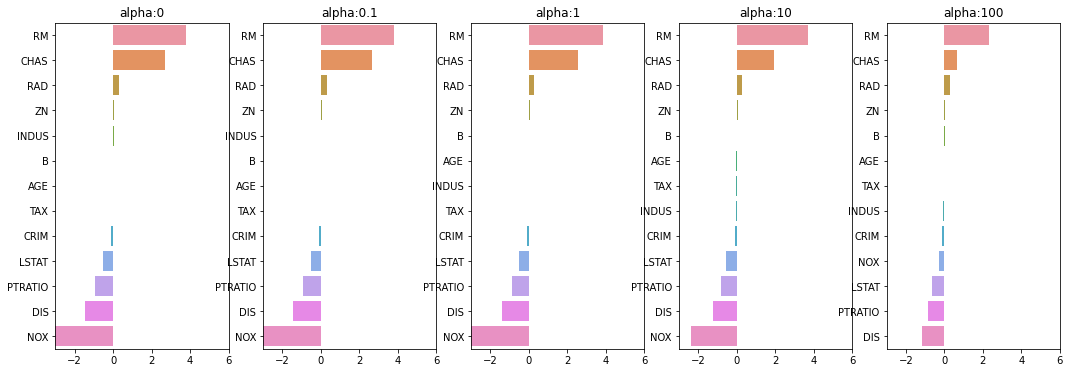

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아진다. 

DataFrame에 저장된 alpha값의  변화에 따른 릿지 회귀 계수 값을 구해본다.

In [6]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있다. 하지만 릿지 회귀의 경우에는 회귀 계수를 0으로 만들지는 않는다.

### 라쏘(Lasso) 회귀

$W$의 절대값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 라쏘(Lasso) 회귀이다. 즉 L1 규제는 $alpha*||W||_1$를 의미하며, 라쏘 회귀 비용함수의 목표는 $RSS(W)+alpha*||W||_1$식을 최소화하는 W를 찾는 것이다. L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, `L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거한다.` 이러한 측면에서 L1규제는 적절한 피처만 회귀에 포함시키는 피처 셀렉션의 특성을 가지고 있다.

사이킷런은 Lasso 클래스를 통해 라쏘 회귀를 구현하였다.

Lasso 클래스의 주요 생성 파라미터는 alpha이며 이는 라쏘 회귀의 alpha L1 규제 계수에 해당한다. 이 Lasso 클래스를 이용해 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해 본다.

alpha값을 변화시키면서 결과를 출력할 것이므로 이의 수행을 위한 별도의 함수 get_linear_reg_eval()함수를 정의한다. get_linear_reg_eval()는 인자로 회귀 모델의 이름, alpha값들의 리스트, 피처 데이터 세트와 타깃 데이터 세트를 입력받아서 alpha값에 따른 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환한다.

In [7]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [8]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


alpha가 0.07일 때 5.612로 가장 좋은 평균 RMSE를 보여준다. 앞의 릿지 평균 5.5118보다는 약간 떨어지는 수치지만, LinearRegression 평균인 5.829보다는 향상됐다.

다음은 alpha 갑셍 따른 피처별 회귀 계수이다.

In [9]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회구 계수는 아예 0으로 바뀌고 있다. 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있다.

### 엘라스틱넷(Elastic Net)회귀

+ 엘라스틱넷(Elastic Net)회귀는 L2규제와 L1규제를 결합한 회귀이다. 따라서 엘라스틱넷 회귀 비용함수의 목표는 $RSS(W)+alpha2*||W||_2^2+alpha*||W||_1$식을 최소화 하는 $W$를 찾는 것이다.

+ 엘라스틱넷은 라쏘 회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강하다. 특히 이러한 성향으로 인해 $alpha$ 값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데, 엘라스틱넷 회귀는 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이다.

사이킷런은 ElasticNet 클래스를 통해서 엘라시특넷 회귀를 구현한다.

ElasticNet 클래스의 주요 생성 파라미터는 $alpha$와 l1_ratio이다. ElasticNet 클래스의 $alpha$는 Ridge와 Lasso 클래스의 $alpha$값과는 다르다.

__엘라스틱넷의 규지는 a * L1규제 + b * L2규제로 정의될 수 있다.__

+ ElasticNet alpha 파라미터 
    + 이 때 a는 L1 규제의 alpha 값, b는 L2규제의 alpha값이다. 따라서 ElasticNet클래스의 alpha파라미터 값은 a+b이다.

+ Elasticnet l1_ratio 파라미터
    + ElasticNet 클래스의 l1_ratio 파라미터 값은 a/(a+b)이다.
    + l1_ratio가 0이면 a가 0이므로 L2 규제와 동일하다.
    + l1_ratio가 1이면 b가 0이므로 L1 규제와 동일하다.
    + 0 < l1_ratio <1이며 L1과 L2 규제를 함께 적절히 적용한다.
    
만일 ElasticNet의 alpha가 10, l1_ratio가 0.7이라면 l1_ratio = 0.7 = a/(a+b) = 7/10 이므로 a=7이고 L1 alpha값은 7, L2 alpha값은 3이다.

이전의 릿지, 라쏘 회귀 예제 코드와 유사하게 엘라스틱넷 apla값을 변화시키면서 RMSE와 각 피처의 회귀 계수를 출력해본다. 주의해야할 점은 get_linear_reg_eval()를 보면 elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)으로 ElasticNet객체를 생성할 때 l1_ratio를 0.7로 고정했다. 이는 단순히 alpha값의 변화만 살피기 위함으로 l1_ratio를 미리 고정한것이다.

In [10]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [11]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha가 0.5일 때 RMSE가 5.467정도로 가장 좋은 예측 성능을 보이고 있다. alpha값에 따른 피처들의 회귀 계수들 값이 라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있다.

각각의 알고리즘에서 하이퍼 파라미터를 변경해가며 최적의 예측 성능을 찾아내야한다. 하지만 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지않게 먼저 데이터 분포도의 정규화와 인코딩 방법이 매우 중요하다.

### 선형 회귀 모델을 위한 데이터 변환

+ 선형 회귀 모델은 일반적으로 피처와 타겟값 간에 선형의 관계가 있다고 가정하고 이러한 최적의 선형 함수를 찾아내 결과 값을 예측한다.

+ 선형 회귀 모델은 피처값과 타겟값의 분포가 정규 분포 형태를 선호한다.

![비대칭](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Relationship_between_mean_and_median_under_different_skewness.png/700px-Relationship_between_mean_and_median_under_different_skewness.png)

정규 분포 형태가 아니라 특정값의 분포가 치우친 왜곡(skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높다. 따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/ 정규화 작업을 수행하는 것이 일반적이다.

일반적으로 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우에 이러한 변환 작업을 수행한다.

변환 대상 | 설명
----------|---------
타겟값 변환 | 타겟값은 정규 분포 선호, skwq되어 있을 경우 주로 로그 변환을 적용
피처값 변환 - 스케일링(scaling)|피처들에 대한 균일한 스케일링/정규화 적용. StandardScaler를 이용하여 표준 정규 분포 형태 변환 또는 MinMaxScaler를 이용하여 최솟값 0, 최대값 1로 변환
피처값 변환 - 다항 특성 변환 | 스케일링/정규화 수행한 데이터 세트에 다시 다항 특성(ploynomial feature)을 적용하여 변환(보통 스케일링/정규화를 수행하고도 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용)
피처값 변환 - 로그 변환 | 왜도(skewness)가 심한 중요 피처들에 대해서 로그 변환을 적용, 일반적으로 많이 사용된다.

보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정한다. 이를 위해 get_scaled_data() 함수를 생성한다. 해당 함수는 method 인자로 변환방법을 결정하며 p_degree는 다항식 특성을 추가할 때 다항식 차수가 입력된다. 다항식 차수는 2를 넘기지 않는다.

그리고 로그 변환인 경우 np.log1p()를 이용한다. 일반적으로 log()함수를 적용하면 언더 플로우가 발생하기 쉬워서 1+log()함수를 적용하는데 이를 구현한 것이 np.log1p()이기 때문이다.

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

이제 Ridge 클래스의 alpha값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력받을 경우에 RMSE값이 어떻게 변하는지 살펴본다.

데이터의 변환 방법은 모두 6가지이다.
+ (None,None) : 아무런 변환을 하지 않은 원본 데이터
+ ('Standard',None) : 표준 정규 분포
+ ('Standard', 2) : 표준 정규 분포를 다시 2차 다항식 변환
+ ('MinMax', None) : 최솟값/최댓값 정규화
+ ('MinMax', 2) : 최솟값/최댓값 정규화를 다시 2차 다항식 변환
+ ('Log', None) :  로그 변환

In [14]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

일반적으로 선형 회귀를 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우에 이처럼 로그 변환을 적용하는 것이 좋은 결과를 기대할 수 있다. 